In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import folium

In [2]:
pwd

'/Users/roshni/Documents/KAGR-Project/Project/Project/KAGR-Fan-Engagement-Data-Analysis/notebooks'

In [3]:
cd ..

/Users/roshni/Documents/KAGR-Project/Project/Project/KAGR-Fan-Engagement-Data-Analysis


/Users/roshni/Documents/KAGR-Project/Project/Project/KAGR-Fan-Engagement-Data-Analysis/.venv/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
ls

Dockerfile             models/                scripts/
README.md              notebooks/             streamlit_app/
data/                  otherproject-exmaples  version.py
docker-compose.yml     requirements.txt


In [5]:
data = pd.read_csv("data/CCG.csv")

In [6]:
data.shape

(1000, 14)

In [7]:
data.head()

,Fan_ID,Fan_Type,Age,Gender,Income_Level,STM_Holder,Attendance_Trend,Distance_to_Arena_Miles,Lifetime_Concessions_Spend,Lifetime_Retail_Spend,Lifetime_Games_Attended,Lifetime_Ticket_Units,Lifetime_Ticket_Spend,Total_Engagement_Score
0,1,Alumni,64,Non-binary,Medium,0,Decreasing,1.00,263.25,567.0,27,27,2666.25,66.24
1,2,General Fan,29,Female,High,0,Stable,25.90,34.85,46.0,2,2,230.00,60.86
2,3,General Fan,33,Non-binary,High,1,Stable,13.50,2583.00,1428.0,84,84,4032.00,51.83
3,4,Alumni,41,Female,High,0,Stable,6.40,352.60,216.0,8,16,1020.00,42.10
4,5,Student,22,Male,Low,0,Increasing,1.94,200.00,0.0,8,24,630.00,21.06


In [8]:
data.isnull().sum()

Fan_ID                        0
Fan_Type                      0
Age                           0
Gender                        0
Income_Level                  0
STM_Holder                    0
Attendance_Trend              0
Distance_to_Arena_Miles       0
Lifetime_Concessions_Spend    0
Lifetime_Retail_Spend         0
Lifetime_Games_Attended       0
Lifetime_Ticket_Units         0
Lifetime_Ticket_Spend         0
Total_Engagement_Score        0
dtype: int64

In [9]:
data.dtypes

Fan_ID                          int64
Fan_Type                       object
Age                             int64
Gender                         object
Income_Level                   object
STM_Holder                      int64
Attendance_Trend               object
Distance_to_Arena_Miles       float64
Lifetime_Concessions_Spend    float64
Lifetime_Retail_Spend         float64
Lifetime_Games_Attended         int64
Lifetime_Ticket_Units           int64
Lifetime_Ticket_Spend         float64
Total_Engagement_Score        float64
dtype: object

## Step 1: Data Cleaning
### Handle missing values, drop duplicates, and preprocess columns

In [10]:
### Step 1: Data Cleaning
# Handle missing values, drop duplicates, and preprocess columns
print("Data Cleaning Step...\n")
data.drop_duplicates(inplace=True)
data.fillna({'Income_Level': 'Unknown', 'Fan_Type': 'Unknown'}, inplace=True)
data['Income_Level'] = data['Income_Level'].map({'Low': 1, 'Medium': 2, 'High': 3, 'Unknown': 0})
data['STM_Holder'] = data['STM_Holder'].map({0: 'No', 1: 'Yes'})
data.dropna(inplace=True)  # Drop any remaining NaNs
print("Data cleaned and preprocessed.\n")

Data Cleaning Step...

Data cleaned and preprocessed.



In [11]:
data.head()

,Fan_ID,Fan_Type,Age,Gender,Income_Level,STM_Holder,Attendance_Trend,Distance_to_Arena_Miles,Lifetime_Concessions_Spend,Lifetime_Retail_Spend,Lifetime_Games_Attended,Lifetime_Ticket_Units,Lifetime_Ticket_Spend,Total_Engagement_Score
0,1,Alumni,64,Non-binary,2,No,Decreasing,1.00,263.25,567.0,27,27,2666.25,66.24
1,2,General Fan,29,Female,3,No,Stable,25.90,34.85,46.0,2,2,230.00,60.86
2,3,General Fan,33,Non-binary,3,Yes,Stable,13.50,2583.00,1428.0,84,84,4032.00,51.83
3,4,Alumni,41,Female,3,No,Stable,6.40,352.60,216.0,8,16,1020.00,42.10
4,5,Student,22,Male,1,No,Increasing,1.94,200.00,0.0,8,24,630.00,21.06


In [12]:
# Save the cleaned data
processed_data_path = 'data/cleaned_fan_data.csv'
data.to_csv(processed_data_path, index=False)

In [13]:
processed_data_path

'data/cleaned_fan_data.csv'

### Step 2: Clustering Analysis
# Normalize data for clustering analysis

Performing Clustering Analysis...

Checking data before clustering analysis...
   Fan_ID     Fan_Type  Age      Gender  Income_Level STM_Holder  \
0       1       Alumni   64  Non-binary             2         No   
1       2  General Fan   29      Female             3         No   
2       3  General Fan   33  Non-binary             3        Yes   
3       4       Alumni   41      Female             3         No   
4       5      Student   22        Male             1         No   

  Attendance_Trend  Distance_to_Arena_Miles  Lifetime_Concessions_Spend  \
0       Decreasing                     1.00                      263.25   
1           Stable                    25.90                       34.85   
2           Stable                    13.50                     2583.00   
3           Stable                     6.40                      352.60   
4       Increasing                     1.94                      200.00   

   Lifetime_Retail_Spend  Lifetime_Games_Attended  Lifetime_T

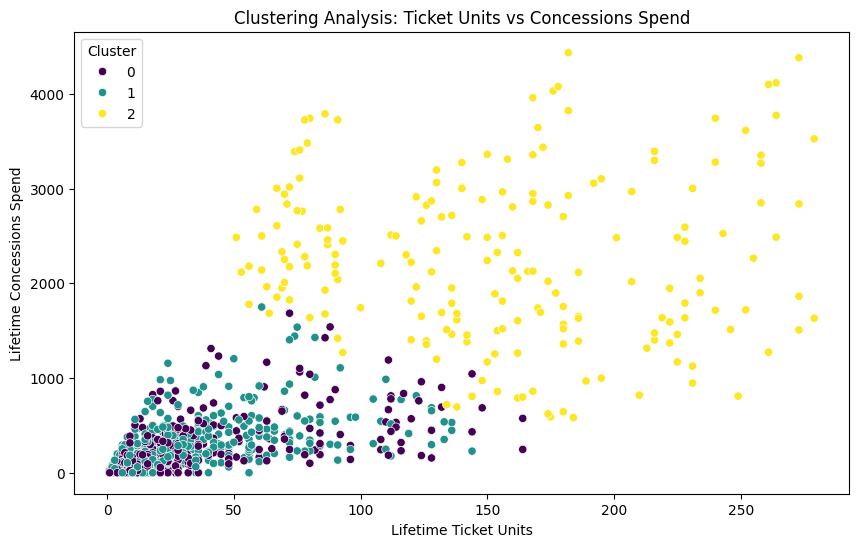

Clustering analysis completed.



In [14]:
print("Performing Clustering Analysis...\n")

# Verify the data before clustering
print("Checking data before clustering analysis...")
print(data.head())
print(f"Data shape: {data.shape}\n")

# Ensure features exist in the data
features = ['Income_Level', 'Lifetime_Ticket_Units', 'Lifetime_Concessions_Spend', 'Distance_to_Arena_Miles']
missing_features = [feature for feature in features if feature not in data.columns]
if missing_features:
    print(f"Error: The following required features are missing from the data: {missing_features}")
else:
    # Check if there are enough rows for clustering
    if data.shape[0] == 0:
        print("Error: No data available for clustering after data cleaning.")
    else:
        # Proceed with clustering analysis
        X = data[features]
        scaler = StandardScaler()
        try:
            X_scaled = scaler.fit_transform(X)
            
            # Apply k-means clustering
            kmeans = KMeans(n_clusters=3, random_state=42)
            clusters = kmeans.fit_predict(X_scaled)
            data['Cluster'] = clusters

            # Visualize Clusters
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=data, x='Lifetime_Ticket_Units', y='Lifetime_Concessions_Spend', hue='Cluster', palette='viridis')
            plt.title('Clustering Analysis: Ticket Units vs Concessions Spend')
            plt.xlabel('Lifetime Ticket Units')
            plt.ylabel('Lifetime Concessions Spend')
            plt.show()

            print("Clustering analysis completed.\n")
        except ValueError as e:
            print(f"Error during scaling or clustering: {e}")


In [15]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

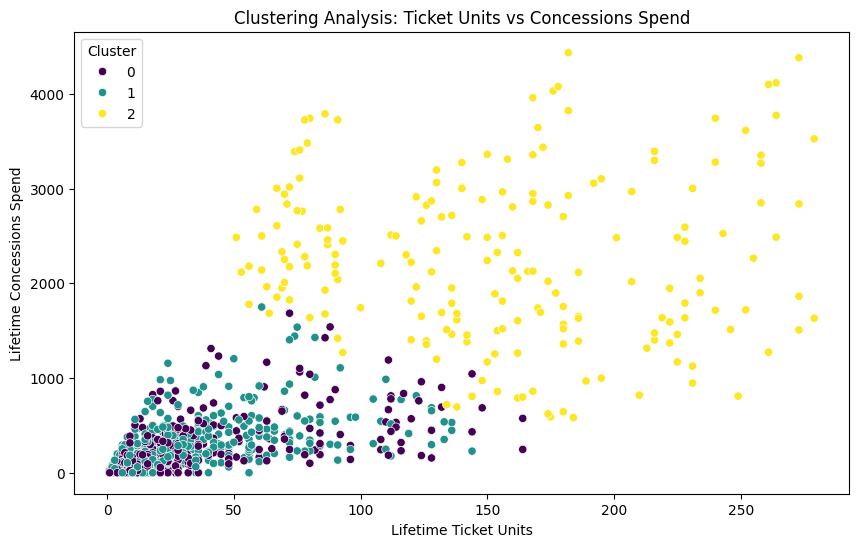

Clustering analysis completed.



In [16]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Lifetime_Ticket_Units', y='Lifetime_Concessions_Spend', hue='Cluster', palette='viridis')
plt.title('Clustering Analysis: Ticket Units vs Concessions Spend')
plt.xlabel('Lifetime Ticket Units')
plt.ylabel('Lifetime Concessions Spend')
plt.show()

print("Clustering analysis completed.\n")

In [17]:
### Step 3: Predictive Modeling for Attendance Likelihood
# Feature engineering and target definition
print("Predictive Modeling Step...\n")
features = ['Income_Level', 'Lifetime_Ticket_Units', 'Lifetime_Concessions_Spend', 'Distance_to_Arena_Miles', 'Cluster']
X = data[features]
y = (data['Attendance_Trend'] == 'Increasing').astype(int)  # Binary target: Increasing attendance or not

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

Predictive Modeling Step...



RandomForestClassifier(random_state=42)

In [18]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.58

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.73      0.68       119
           1       0.48      0.37      0.42        81

    accuracy                           0.58       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.57      0.58      0.57       200



In [19]:
# Save the trained model
import joblib
model_path = 'models/attendance_predictive_model.pkl'
joblib.dump(model, model_path)
print("Predictive modeling completed.\n")

Predictive modeling completed.



In [20]:
### Step 4: Geospatial Analysis
# Creating a heatmap of fan locations
print("Geospatial Analysis Step...\n")
map_center = [data['Distance_to_Arena_Miles'].median(), data['Lifetime_Concessions_Spend'].median()]
fan_map = folium.Map(location=map_center, zoom_start=10)

Geospatial Analysis Step...



In [21]:
# Plot fan locations on the map
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Distance_to_Arena_Miles'], row['Lifetime_Concessions_Spend']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(fan_map)

heatmap_path = 'streamlit_app/fan_heatmap.html'
fan_map.save(heatmap_path)
print("Geospatial analysis completed.\n")

Geospatial analysis completed.



In [22]:
### Step 5: Scenario Planning
# Basic scenario analysis using sliders in the Streamlit app
print("Scenario Planning Preparation...\n")
def run_scenario(ticket_discount_percentage):
    # Simulate increase in fan attendance with different ticket discount levels
    discount_effect = ticket_discount_percentage * 0.01  # Placeholder effect
    increased_attendance = data['Lifetime_Ticket_Units'] * (1 + discount_effect)
    return increased_attendance

# Prepare data for use in Streamlit
print("Scenario planning data prepared.\n")

### Summary
print("Analysis Workflow Completed.\n")

Scenario Planning Preparation...

Scenario planning data prepared.

Analysis Workflow Completed.

